<a href="https://colab.research.google.com/github/herkart1011/MachineLearningTasks/blob/main/Week%201/03_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive

## Importing the dataset

In [ ]:
#Import Dataset
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Dataset/Week 1/Position_Salaries.csv')

# Menampilkan 5 baris pertama dari dataset untuk melihat fitur dan target
print("Dataset Position_Salaries.csv:")
print(dataset.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Position_Salaries.csv:
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [ ]:
X = dataset.iloc[:, 1:2].values  # Menggunakan kolom 'Level' sebagai fitur (2D array)
y = dataset.iloc[:, -1].values   # Menggunakan kolom 'Salary' sebagai target

## Training the Linear Regression model on the whole dataset

In [ ]:
from sklearn.linear_model import LinearRegression

# Membuat model Linear Regression
lin_reg = LinearRegression()

# Melatih model Linear Regression pada keseluruhan dataset
lin_reg.fit(X, y)

# Menampilkan hasil prediksi model pada data training
y_pred = lin_reg.predict(X)

## Training the Polynomial Regression model on the whole dataset

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Membuat fitur polinomial dari 'Level'
poly_features = PolynomialFeatures(degree=4)  # Menggunakan derajat polinomial 4
X_poly = poly_features.fit_transform(X)  # Mengubah fitur X menjadi fitur polinomial

# Membuat model Linear Regression pada fitur polinomial
poly_reg = LinearRegression()  # Pastikan variabel poly_reg didefinisikan di sini
poly_reg.fit(X_poly, y)  # Melatih model pada fitur polinomial

LinearRegression()

## Visualising the Linear Regression results

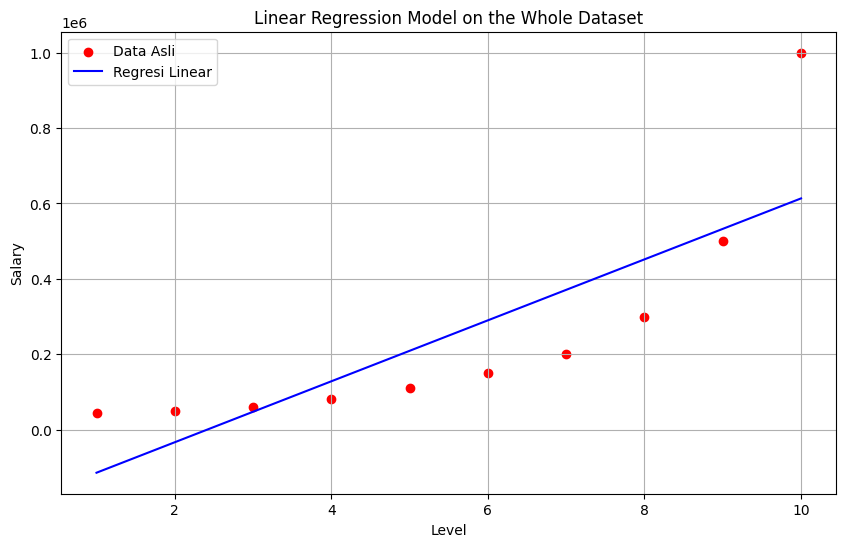

In [ ]:
# Visualisasi Hasil Linear Regression pada dataset asli
plt.figure(figsize=(10, 6))

# Scatter plot data asli
plt.scatter(X, y, color='red', label='Data Asli')

# Garis Linear Regression
plt.plot(X, y_pred, color='blue', label='Regresi Linear')

# Menambahkan judul dan label
plt.title('Linear Regression Model on the Whole Dataset')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.show()


## Visualising the Polynomial Regression results

<ipython-input-25-1c2bf5b2091f>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)  # Membuat grid dengan jarak 0.1


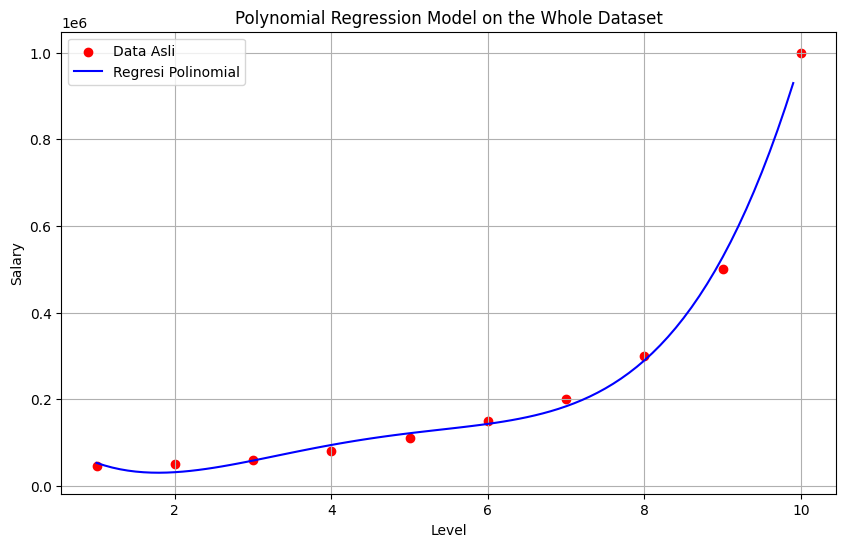

In [ ]:
# Visualisasi Hasil Polynomial Regression pada dataset asli
plt.figure(figsize=(10, 6))

# Menampilkan data asli dengan titik merah
plt.scatter(X, y, color='red', label='Data Asli')

# Menampilkan garis hasil prediksi model polinomial
# Menggunakan X grid untuk menampilkan kurva yang lebih halus
X_grid = np.arange(min(X), max(X), 0.1)  # Membuat grid dengan jarak 0.1
X_grid = X_grid.reshape((len(X_grid), 1))  # Mengubah menjadi 2D array

# Memprediksi nilai dengan fitur polinomial pada grid
y_grid_pred = poly_reg.predict(poly_features.transform(X_grid))

# Menampilkan garis polinomial
plt.plot(X_grid, y_grid_pred, color='blue', label='Regresi Polinomial')

# Menambahkan detail pada plot
plt.title('Polynomial Regression Model on the Whole Dataset')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.show()

## Predicting a new result with Linear Regression

Prediksi gaji untuk Level 3.5 dengan Linear Regression: 87742.42424242425


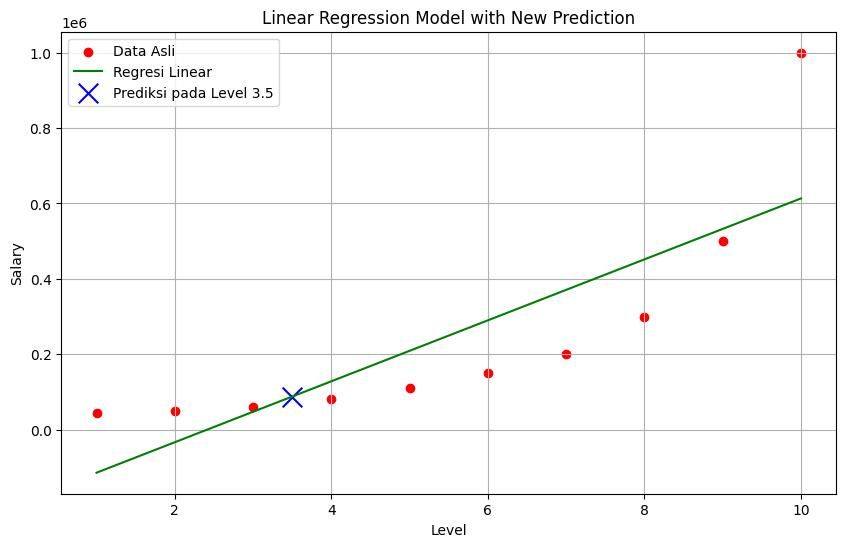

In [ ]:
# Membuat Prediksi Baru dengan Linear Regression
# Misalkan kita ingin memprediksi Salary untuk Level 6.5
level = 3.5
salary_prediction_linear = lin_reg.predict([[level]])  # Menggunakan array 2D [[level]]
print(f'Prediksi gaji untuk Level {level} dengan Linear Regression: {salary_prediction_linear[0]}')

# Visualisasi Hasil Linear Regression dan Prediksi Baru
plt.figure(figsize=(10, 6))

# Scatter plot data asli
plt.scatter(X, y, color='red', label='Data Asli')

# Garis Linear Regression
plt.plot(X, lin_reg.predict(X), color='green', label='Regresi Linear')

# Menampilkan prediksi baru pada Level 3.5
plt.scatter(level, salary_prediction_linear, color='blue', s=200, marker='x', label=f'Prediksi pada Level {level}')

# Menambahkan detail pada plot
plt.title('Linear Regression Model with New Prediction')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.show()

## Predicting a new result with Polynomial Regression

Prediksi gaji untuk Level 3.5 dengan Polynomial Regression: 77125.12747661874
Prediksi gaji untuk Level 3.5 dengan Polynomial Regression: 77125.12747661874


<ipython-input-32-cafe1556d2cf>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)  # Membuat grid dengan jarak 0.1


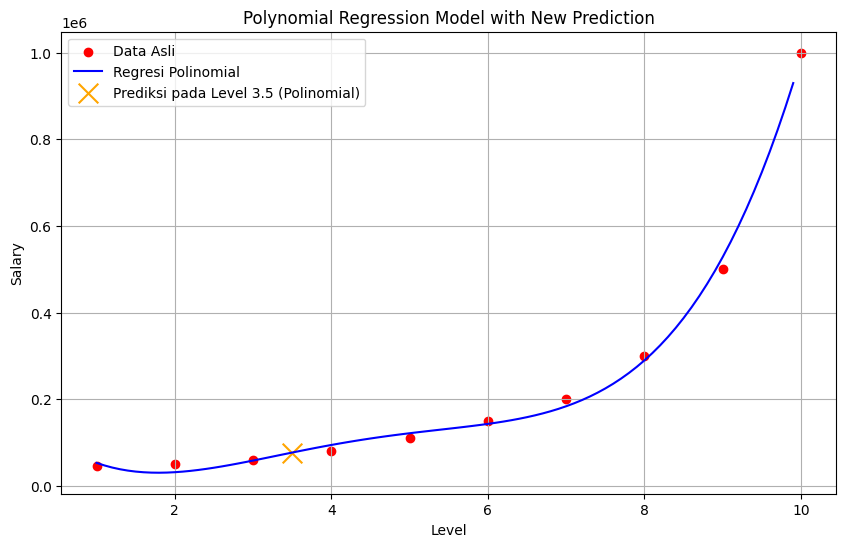

In [ ]:
# Membuat Prediksi Baru dengan Polynomial Regression
salary_prediction_poly = poly_reg.predict(poly_features.transform([[level]]))  # Mengubah level ke fitur polinomial
print(f'Prediksi gaji untuk Level {level} dengan Polynomial Regression: {salary_prediction_poly[0]}')

# Membuat Prediksi Baru dengan Polynomial Regression untuk Level 3.5
level = 3.5
salary_prediction_poly = poly_reg.predict(poly_features.transform([[level]]))  # Prediksi dengan Polynomial Regression
print(f'Prediksi gaji untuk Level {level} dengan Polynomial Regression: {salary_prediction_poly[0]}')

# Visualisasi Hasil Polynomial Regression dan Prediksi Baru
plt.figure(figsize=(10, 6))

# Scatter plot data asli
plt.scatter(X, y, color='red', label='Data Asli')

# Menampilkan garis hasil prediksi model polinomial
# Menggunakan X grid untuk menampilkan kurva yang lebih halus
X_grid = np.arange(min(X), max(X), 0.1)  # Membuat grid dengan jarak 0.1
X_grid = X_grid.reshape((len(X_grid), 1))  # Mengubah menjadi 2D array
y_grid_pred = poly_reg.predict(poly_features.transform(X_grid))  # Memprediksi nilai pada grid

# Menampilkan kurva polinomial
plt.plot(X_grid, y_grid_pred, color='blue', label='Regresi Polinomial')

# Menampilkan prediksi baru pada Level 3.5
plt.scatter(level, salary_prediction_poly, color='orange', s=200, marker='x', label=f'Prediksi pada Level {level} (Polinomial)')

# Menambahkan detail pada plot
plt.title('Polynomial Regression Model with New Prediction')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.show()


# Kesimpulan
  Kode di atas membandingkan model Linear Regression dan Polynomial Regression untuk memprediksi Salary berdasarkan Level karyawan. Model Linear Regression menghasilkan garis lurus yang tidak akurat, sedangkan model Polynomial Regression dengan degree=4 mampu menangkap hubungan non-linear antara Level dan Salary dengan lebih baik, seperti yang terlihat pada kurva yang sesuai dengan data asli. Prediksi baru pada Level 3.5 juga divisualisasikan, menunjukkan bahwa Polynomial Regression lebih cocok digunakan untuk dataset dengan hubungan yang kompleks dibandingkan Linear Regression.